In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
default_prob_df = pd.read_csv("C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/ENGR_5520G_G5/Default_Probability_Prediction/Cleaned_probability_default_dataset.csv")

In [20]:
default_prob_df.head()

,AppliedAmount,Amount,ProbabilityOfDefault,UseOfLoan,TotalLiabilities,TotalIncome,DebtToIncome,FreeCash,NewCreditCustomer,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,Age,EmploymentStatus,EmploymentDurationCurrentEmployer,HomeOwnershipType,Rating,Restructured
0,2125.0,2125.0,0.122216,7,6.214788,5.872118,3.306520,7.760007,0,0.000000,1000.0,0.693147,6.216606,53,3,0.693147,7,3,0
1,3000.0,3000.0,0.036400,3,6.608608,6.803505,3.452524,7.788543,0,0.000000,1000.0,0.693147,7.496097,50,0,0.000000,7,2,0
2,10630.0,9100.0,0.041300,3,6.820016,7.090910,3.321793,7.894851,1,0.000000,1000.0,0.000000,0.000000,44,0,1.945910,5,0,0
3,1500.0,1500.0,0.188726,7,5.863631,6.761573,2.123458,7.931454,1,1.609438,1000.0,0.000000,0.000000,42,1,2.197225,4,6,0
4,1595.0,1090.0,0.749511,10,6.854355,6.548219,3.611998,7.795568,1,1.945910,1000.0,0.000000,0.000000,34,3,0.693147,9,7,0


In [21]:
default_prob_df.describe()

,AppliedAmount,Amount,ProbabilityOfDefault,UseOfLoan,TotalLiabilities,TotalIncome,DebtToIncome,FreeCash,NewCreditCustomer,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,Age,EmploymentStatus,EmploymentDurationCurrentEmployer,HomeOwnershipType,Rating,Restructured
count,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000,179235.000000
mean,2699.127966,2543.473023,0.231987,8.968661,4.587818,1.458264,0.617639,7.788139,0.560170,0.096525,969.038413,0.638903,4.344731,40.389137,4.225988,0.781842,6.636310,4.018579,0.312484
std,2342.758228,2182.064156,0.139558,1.364210,2.546204,2.901043,1.309155,0.095591,0.496368,0.380086,86.969200,0.723917,4.191922,12.359547,1.571991,0.435064,2.029641,1.780162,0.463507
min,10.000000,6.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,740.000000,740.000000,0.124240,9.000000,3.948162,0.000000,0.000000,7.755339,0.000000,0.000000,1000.000000,0.000000,0.000000,31.000000,5.000000,0.693147,5.000000,3.000000,0.000000
50%,2125.000000,2125.000000,0.209589,9.000000,5.621270,0.000000,0.000000,7.755339,1.000000,0.000000,1000.000000,0.693147,6.274762,39.000000,5.000000,0.693147,7.000000,4.000000,0.000000
75%,4150.000000,3825.000000,0.318264,9.000000,6.329605,0.000000,0.000000,7.755339,1.000000,0.000000,1000.000000,1.098612,8.355615,49.000000,5.000000,0.693147,9.000000,5.000000,1.000000
max,10632.000000,10632.000000,0.994429,16.000000,16.333207,12.339515,5.293405,11.989673,1.000000,2.397895,1000.000000,3.332205,11.195183,77.000000,5.000000,2.197225,11.000000,7.000000,1.000000


In [22]:
# Perfroming normalization of data using Robust Scaler.
from sklearn.preprocessing import RobustScaler
scaler_x = RobustScaler()
scaler_y = RobustScaler()

X = default_prob_df.drop('ProbabilityOfDefault',axis=1) 
X = pd.DataFrame(scaler_x.fit_transform(X), columns=X.columns)
y = default_prob_df[['ProbabilityOfDefault']] 
y = scaler_y.fit_transform(y)

In [24]:
import joblib
joblib.dump(scaler_x, 'defaultprob_scaler_X.pkl')
joblib.dump(scaler_y, 'defaultprob_scaler_y.pkl')

['defaultprob_scaler_y.pkl']

In [13]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBOOST

In [25]:
import xgboost as xgb
from xgboost import XGBRegressor

# Training and fitting into the model.
xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.1)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating metrics to analyse model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.18372498932093745
Mean Squared Error (MSE): 0.08688998209216717
Root Mean Squared Error (RMSE): 0.2947710672575705
R² Score: 0.8318606853811843


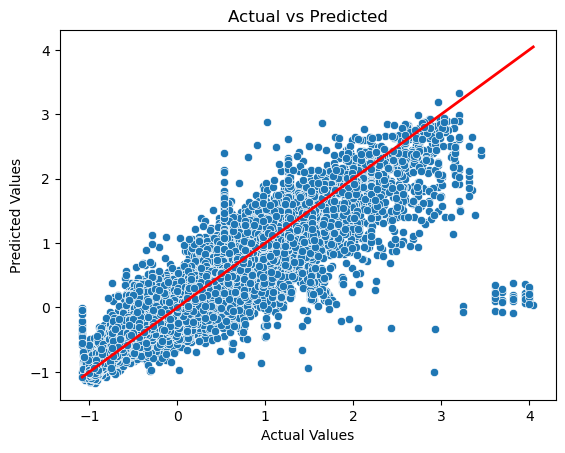

In [27]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()  

# Visualizing the error by plotting actual versus predicted values to see the model's deviation.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Training and fitting the model.
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

C:\Users\KRISHNA\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [12]:
# Calculating the metrics for analysing the model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.18521396118050668
Mean Squared Error (MSE): 0.09035251985726693
Root Mean Squared Error (RMSE): 0.3005869588942057
R² Score: 0.8251603879171097


In [ ]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()  

# Plotting the actual Vs predicted values.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Training and fitting the model.
gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
gb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_reg.predict(X_test)

C:\Users\KRISHNA\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [14]:
# Calculating metrics for analysing model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.19350081384407877
Mean Squared Error (MSE): 0.09217655375688341
Root Mean Squared Error (RMSE): 0.3036059185142533
R² Score: 0.8216307311910019


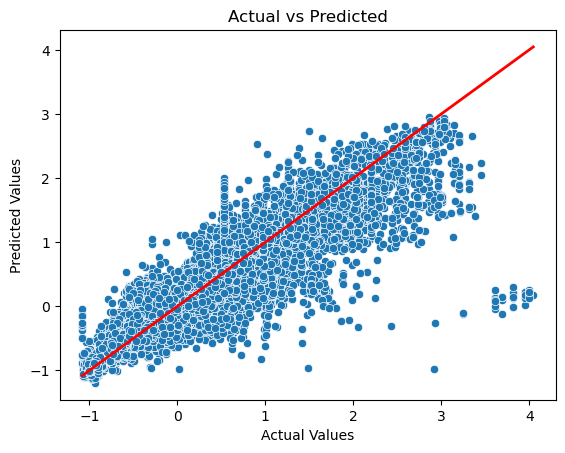

In [16]:
y_test = y_test.ravel()
y_pred = y_pred.ravel() 

# Plotting the scatter plot of actual vs predicted values.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Decision Trees

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Training and fitting the model.
tree_reg = DecisionTreeRegressor(max_depth=200)
tree_reg.fit(X_train, y_train)

# Performing the predictions.
y_pred = tree_reg.predict(X_test)

In [18]:
# Calculating metrics of the model's performance.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.24628956081841688
Mean Squared Error (MSE): 0.1763277548271673
Root Mean Squared Error (RMSE): 0.4199139850340392
R² Score: 0.6587911847712636


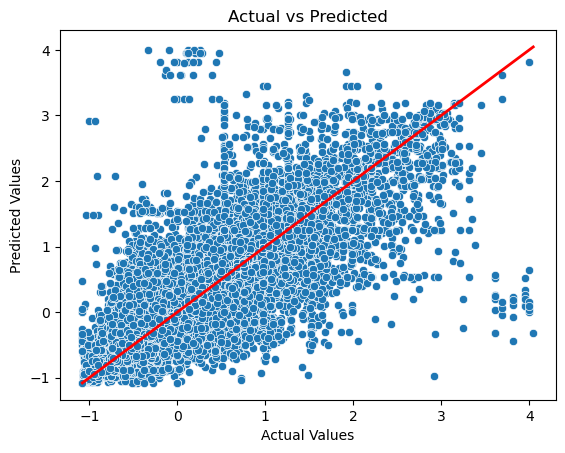

In [19]:
y_test = y_test.ravel()
y_pred = y_pred.ravel() 

# Plotting the actual vs predicted values.
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Here the XGBOOST model shows the least MAE hence we will use this model for default probability prediction.

In [28]:
import joblib
import os
# Defining the file path with double backslashes
model_file_path = os.path.join('C:\\Users\\KRISHNA\\Desktop\\SHWETA\\Fall 2024\\Project\\Models', 'defaultprob_model.joblib')

# Save the model
joblib.dump(xgb_regressor, model_file_path)

['C:\\Users\\KRISHNA\\Desktop\\SHWETA\\Fall 2024\\Project\\Models\\defaultprob_model.joblib']